# Graduation Outcomes for NYC Public School 
* Group member: Qing Dou Ziqi Huang
* Repository: https://github.com/qdou14/GraduationOutcomes

## Abstract

This study focuses on analyzing the impact of school characteristics and student social backgrounds on graduation outcomes in New York City public schools, begins by importing a comprehensive dataset covering various aspects of over 1,800 schools, including demographics, student enrollment, and academic performance metrics. An initial exploratory data analysis (EDA) is conducted to gain insights into the data's nature and distribution.

Following the EDA, the data is prepared. This stage involves handling missing values and outliers to ensure data quality and reliability. A significant part of this preparation includes feature engineering, where new, relevant features are created to deepen the analysis. This step is crucial for revealing more nuanced correlations and patterns within the data.

The prepared data then undergoes a more refined EDA process, focusing on these newly engineered features and their relationships to graduation outcomes. The investigative analysis explores the intricate interplay between school environments and student demographics, using statistical methods to draw out key findings and results.

## 1 Introduction

The New York City Department of Education is the largest public school system in the United States, encompassing over 1,800 schools and serving a diverse student body. Understanding the factors that influence graduation rates in such a vast and varied system is crucial. These graduation outcomes are more than just academic scores; they mirror the city's social and economic realities and significantly affect students' future opportunities.

Our project focuses on a key question: What is the combined effect of school characteristics and student social backgrounds on graduation outcomes in New York City's public schools, and in what ways does this interplay manifest?

This research is important for a city as diverse as New York, where the educational environment varies greatly. We analyze a comprehensive dataset that includes  student enrollment data, the number of English Language Learners, and important academic indicators like graduation rates and Regents exam scores. Our goal is to uncover trends and disparities in the educational achievements of these schools.

### 1.1 Data Source
To conduct our study, we will utilize two datasets from the New York City Department of Education available publicly on the NYC Open Data platform. 

#### 1.1.1 Dataset1 ——2006-2012 School Demographics and Accountability Snapshot

The first dataset is about annual school accounts of NYC public school student populations served by grade, special programs, ethnicity, gender and Title I funded programs. 

Data source: [NYC Open Data (School Demographics)](https://data.cityofnewyork.us/Education/2006-2012-School-Demographics-and-Accountability-S/ihfw-zy9j) 
* Data Dictionary 

| Column Name        | Column Description                                        |
|--------------------|-----------------------------------------------------------|
| DBN                | District, Borough and school number                       |
| Name               | School name                                               |
| Schoolyear         | School Year                                               |
| fl_percent         | Free lunch                                                |
| total_enrollment   | Total enrollment count of students for all grades         |
| ell_percent        | Percentage of English language learner's students         |
| sped_percent       | Percentage of special education students                  |
| asian_per          | Percentage of Asian students                              |
| black_per          | Percentage of Black students                              |
| hispanic_per       | Percentage of Hispanic students                           |
| white_per          | Percentage of White students                              |
| male_per           | Percentage of male students                               |
| female_per         | Percentage of female students                             |

Load the data to show the first rows:

In [1]:
from src.graduation_outcomes.data_preparation import APIClient
api_url = "https://data.cityofnewyork.us/resource/ihfw-zy9j.json"
api = APIClient(api_url)
df1 = api.fetch_all_data()
df1_filtered = api.filter_data(['20082009'])
df1_filtered.head()

,dbn,name,schoolyear,fl_percent,total_enrollment,ell_percent,sped_percent,asian_per,black_per,hispanic_per,white_per,male_per,female_per
3,01M015,P.S. 015 ROBERTO CLEMENTE,20082009,89.4,252,19,24.6,6.3,29.8,59.1,2.8,59.1,40.9
10,01M019,P.S. 019 ASHER LEVY,20082009,61.5,325,8.3,21.5,12,25.5,45.8,9.8,48,52
17,01M020,PS 020 ANNA SILVER,20082009,92.5,593,21.4,17,23.6,9.3,63.4,1.5,48.2,51.8
24,01M034,PS 034 FRANKLIN D ROOSEVELT,20082009,77,424,9,23.1,6.6,20.5,69.6,2.1,50.5,49.5
32,01M063,PS 063 WILLIAM MCKINLEY,20082009,63.9,199,4,27.6,9.5,17.1,65.3,7,63.8,36.2


#### 1.1.2 Dataset 2 -2005-2010 Graduation Outcomes

The first dataset is about graduation Outcomes - Cohorts of 2001 through 2006 (Classes of 2005 through 2010).
Data source: (https://data.cityofnewyork.us/Education/2005-2010-Graduation-Outcomes-School-Level/vh2h-md7a) 

| Column Name                     | Column Description                                        |
|---------------------------------|----------------------------------------------------------|
| Demographic                     | Student's demographic information                        |
| DBN                             | District, Borough and school number                       |
| School Name                     | Name of school                                            |
| Cohort                          | School year test was administered                         |
| Total Cohort                    | Total number of students who took test                    |
| Total Grads - % of Cohort       | Reflects the total percentage of students who graduated   |
| Total Regents - % of Cohort     | Percentages of total Cohorts who passed regents exam      |
| Advanced Regents - % of Cohort  | Percentages of total Cohorts who passed advanced regents  |
| Regents w/o Advanced - % of Cohort | Percentages of total Cohorts who passed non-advanced regents exams |
| Local - % of Cohort             | Percentage of total Cohorts who received a local diploma  |
| Still Enrolled - % of Cohort    | Percentage of total Cohorts students still enrolled       |
| Dropped Out - % of Cohort       | Percentage of total Cohorts students who dropped out      |

Load the data to show the first rows:

In [2]:
from src.graduation_outcomes.data_preparation import DataProcess
csv_url = "https://raw.githubusercontent.com/qdou14/GraduationOutcomes/main/dataset/2005-2010_Graduation_Outcomes_-_School_Level_20231209.csv"
processor = DataProcess(csv_url)
filtered_df2 = processor.filter_data(['2004'], 'Total Cohort')
filtered_df2.head()

,Demographic,DBN,School Name,Cohort,Total Grads - % of cohort,Total Regents - % of cohort,Advanced Regents - % of cohort,Regents w/o Advanced - % of cohort,Local - % of cohort,Still Enrolled - % of cohort,Dropped Out - % of cohort
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,67.3,30.9,0.0,30.9,36.4,27.3,5.5
8,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2004,67.0,32.1,5.4,26.8,34.8,29.5,3.6
15,Total Cohort,01M450,EAST SIDE COMMUNITY SCHOOL,2004,72.5,60.0,0.0,60.0,12.5,16.3,11.3
22,Total Cohort,01M509,MARTA VALLE HIGH SCHOOL,2004,44.6,20.0,4.6,15.4,24.6,41.5,12.3
29,Total Cohort,01M515,LOWER EAST SIDE PREPARATORY HIGH SCHO,2004,48.5,37.0,30.0,7.0,11.5,39.0,12.5


Next, through EDA of the two datasets, we will integrate these tables for further analysis to address subsequent questions.

## 3 Research Approach

* EDA: In the Exploratory Data Analysis (EDA) approach, we focus on gaining an initial understanding of the dataset through visual and statistical methods. We plot box plots and histograms for each variable in the dataset, which helps in identifying the distribution, central tendencies, and potential outliers in the data. Since we are working with two datasets, we will merge them during the data preparation phase. This merging is crucial for a comprehensive analysis, ensuring that all relevant data is considered in our exploratory analysis.

* Data Preparation: The initial step involved meticulous data preparation. We began by addressing missing values in our dataset, opting to replace them with the median values of their respective columns. This approach was chosen to maintain the integrity of the data while dealing with gaps in information. To address the issue of outliers, which can skew analysis and lead to misleading conclusions, we applied winsorization, specifically with parameters set to limits=[0.05, 0.95]. This method effectively limits extreme values, ensuring a more robust and reliable dataset for analysis. Specifically, setting the limits to 0.05 at both ends of our data means that the lowest 5% and the highest 5% of the values in each column are replaced with values closer to the median.

* Investigative Analysis: In this section, we deconstruct our core research question into six smaller questions, each of which is analyzed individually. This methodical breakdown allows for a detailed and focused investigation of each aspect of our core question. By dissecting the overarching query, we can address specific elements more thoroughly, ensuring a comprehensive understanding and uncovering nuanced insights.

* Data Management Strategy: Throughout our project, we employed a rigorous data management strategy, ensuring data integrity, consistency, and relevance. This involved regular data audits, careful documentation of data transformations, and adherence to data privacy and ethical consideration

## 4 Exploratory Data Analysis

First initialize the class EDAPerformer.

In [3]:
from src.graduation_outcomes.graduation_eda import EDAPerformer

### 4.1 Dataset1 overview

Next we check dataset1 Dtype.

In [4]:
df1_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1441 entries, 3 to 10071
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   dbn               1441 non-null   object
 1   name              1441 non-null   object
 2   schoolyear        1441 non-null   object
 3   fl_percent        1441 non-null   object
 4   total_enrollment  1441 non-null   object
 5   ell_percent       1431 non-null   object
 6   sped_percent      1441 non-null   object
 7   asian_per         1441 non-null   object
 8   black_per         1441 non-null   object
 9   hispanic_per      1441 non-null   object
 10  white_per         1441 non-null   object
 11  male_per          1441 non-null   object
 12  female_per        1441 non-null   object
dtypes: object(13)
memory usage: 157.6+ KB


We find that all dtypes are objects and we need to convert them to numeric.

In [5]:
converted_df = api.convert_columns_to_numeric(df1_filtered,[
    'fl_percent', 'total_enrollment', 'ell_percent',
    'sped_percent', 'asian_per', 'black_per',
    'hispanic_per', 'white_per', 'male_per', 'female_per'
])
converted_df.head()

,dbn,name,schoolyear,fl_percent,total_enrollment,ell_percent,sped_percent,asian_per,black_per,hispanic_per,white_per,male_per,female_per
3,01M015,P.S. 015 ROBERTO CLEMENTE,20082009,89.4,252,19.0,24.6,6.3,29.8,59.1,2.8,59.1,40.9
10,01M019,P.S. 019 ASHER LEVY,20082009,61.5,325,8.3,21.5,12.0,25.5,45.8,9.8,48.0,52.0
17,01M020,PS 020 ANNA SILVER,20082009,92.5,593,21.4,17.0,23.6,9.3,63.4,1.5,48.2,51.8
24,01M034,PS 034 FRANKLIN D ROOSEVELT,20082009,77.0,424,9.0,23.1,6.6,20.5,69.6,2.1,50.5,49.5
32,01M063,PS 063 WILLIAM MCKINLEY,20082009,63.9,199,4.0,27.6,9.5,17.1,65.3,7.0,63.8,36.2


We checked again and found that the code was successfully modified to float64.

In [6]:
converted_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1441 entries, 3 to 10071
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dbn               1441 non-null   object 
 1   name              1441 non-null   object 
 2   schoolyear        1441 non-null   object 
 3   fl_percent        1441 non-null   float64
 4   total_enrollment  1441 non-null   int64  
 5   ell_percent       1431 non-null   float64
 6   sped_percent      1441 non-null   float64
 7   asian_per         1441 non-null   float64
 8   black_per         1441 non-null   float64
 9   hispanic_per      1441 non-null   float64
 10  white_per         1441 non-null   float64
 11  male_per          1441 non-null   float64
 12  female_per        1441 non-null   float64
dtypes: float64(9), int64(1), object(3)
memory usage: 157.6+ KB


We found 10 null values in ell_percent, so we first analyzed ell_percent in detail.

#### 4.1.1 Ell_percent analysis
Ell_percent is percentage of english language learner's students per school.

Firstly, our descriptive statistical analysis reveals significant variation in the percentage of English Language Learners (ELL) across different schools, with some reporting no ELL students and others reporting all students as ELL. Such disparities may indicate substantial differences in student population compositions among schools or may suggest issues with data quality. Hence, we will exclude outliers in our subsequent analyses.

In [8]:
eda1 = EDAPerformer(converted_df)
eda1.describe_stats('ell_percent')

count    1431.000000
mean       12.583159
std        13.775012
min         0.000000
25%         3.700000
50%         8.500000
75%        17.050000
max       100.000000
Name: ell_percent, dtype: float64

And then we analyze histograms to see how often the extremes occur.

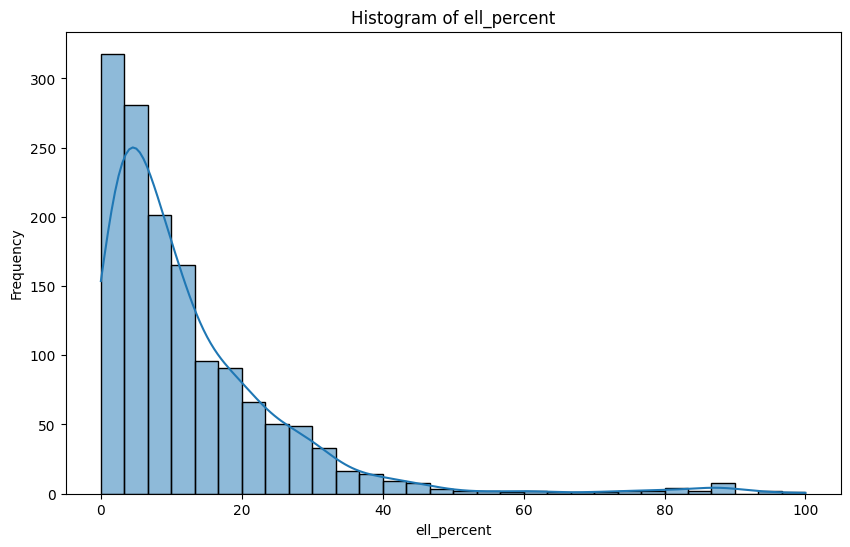

In [9]:
eda1.plot_histogram('ell_percent')

It show the distribution of English Language Learners (ell) percentages across a collection of schools. The distribution is right-skewed, indicating that a majority of schools have a lower percentage of ELL students, with a steep drop-off as the percentage increases. Very few schools have a high percentage of ELL students, as indicated by the long tail extending to the right of the graph.


#### 4.1.2 total_enrollment
Total enrollment count of students for all grades by DBN/School per fiscal school year.


Analyzing the total_enrollment provides us with a foundational understanding of the school size in terms of student population.

The significant variation in school enrollment sizes could affect class sizes, teacher availability, and education quality. School size is crucial in our study of graduation outcomes, as it may relate to other influential factors on student success.

In [10]:
eda1.describe_stats(['total_enrollment',])

,total_enrollment
count,1441.000000
mean,666.968078
std,556.828562
min,48.000000
25%,366.000000
50%,524.000000
75%,794.000000
max,4662.000000


Also we analyze histograms to see how often the extremes occur.

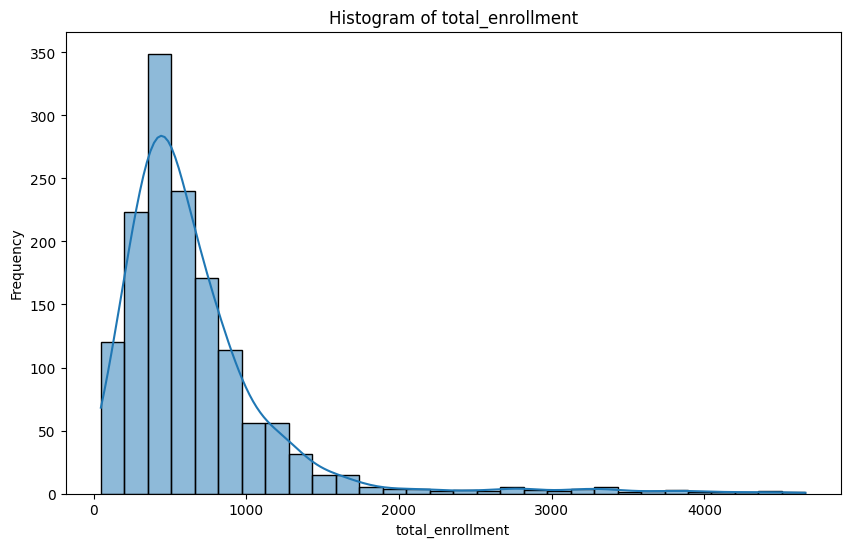

In [11]:
eda1.plot_histogram('total_enrollment')

 Total enrollment across schools is right-skewed, showing that most schools have a relatively small number of students, with fewer schools having very large enrollments.

### 4.1.3 Columns analysis

In this step, because of the large number of columns, we analyze all the remaining columns together to see the quality of the data and the frequency of outliers.

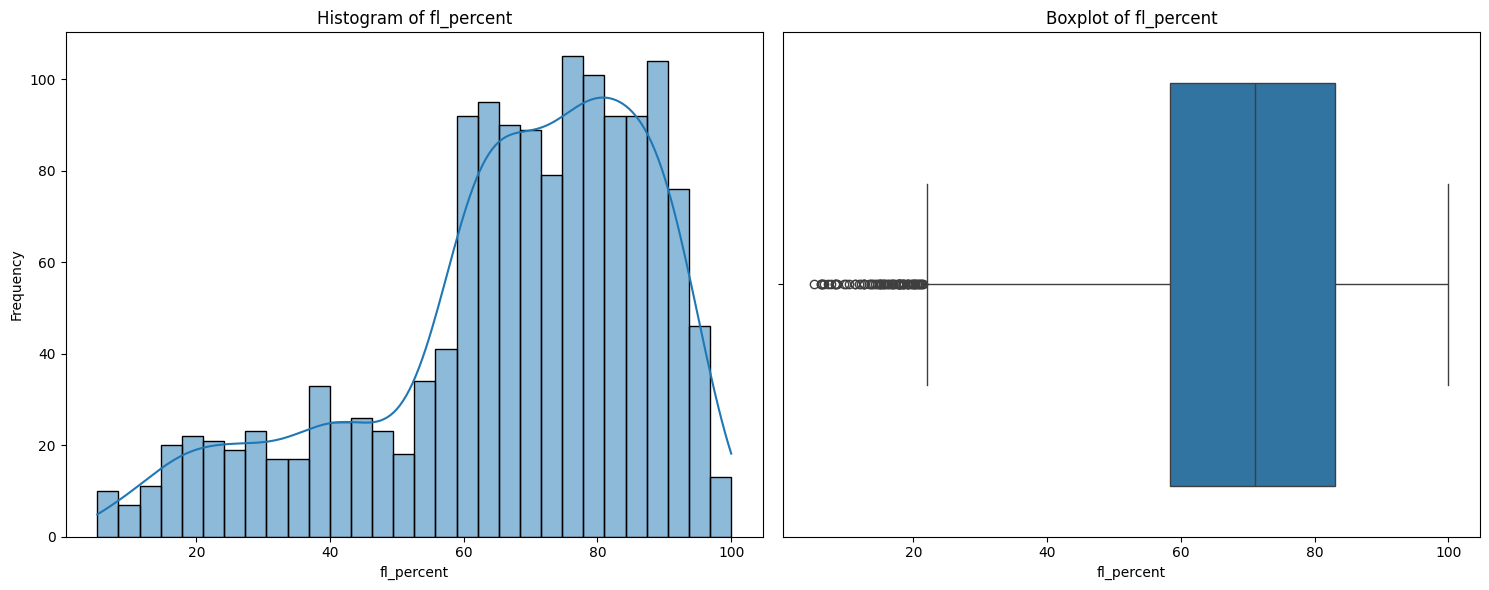

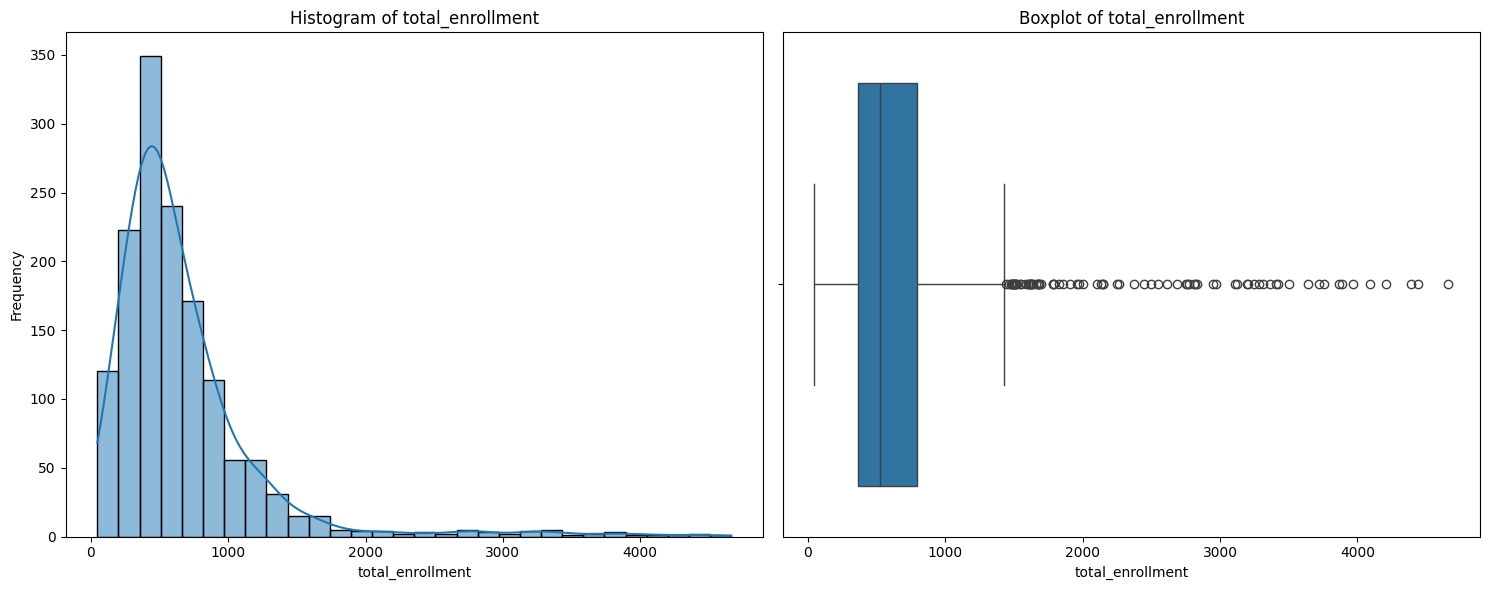

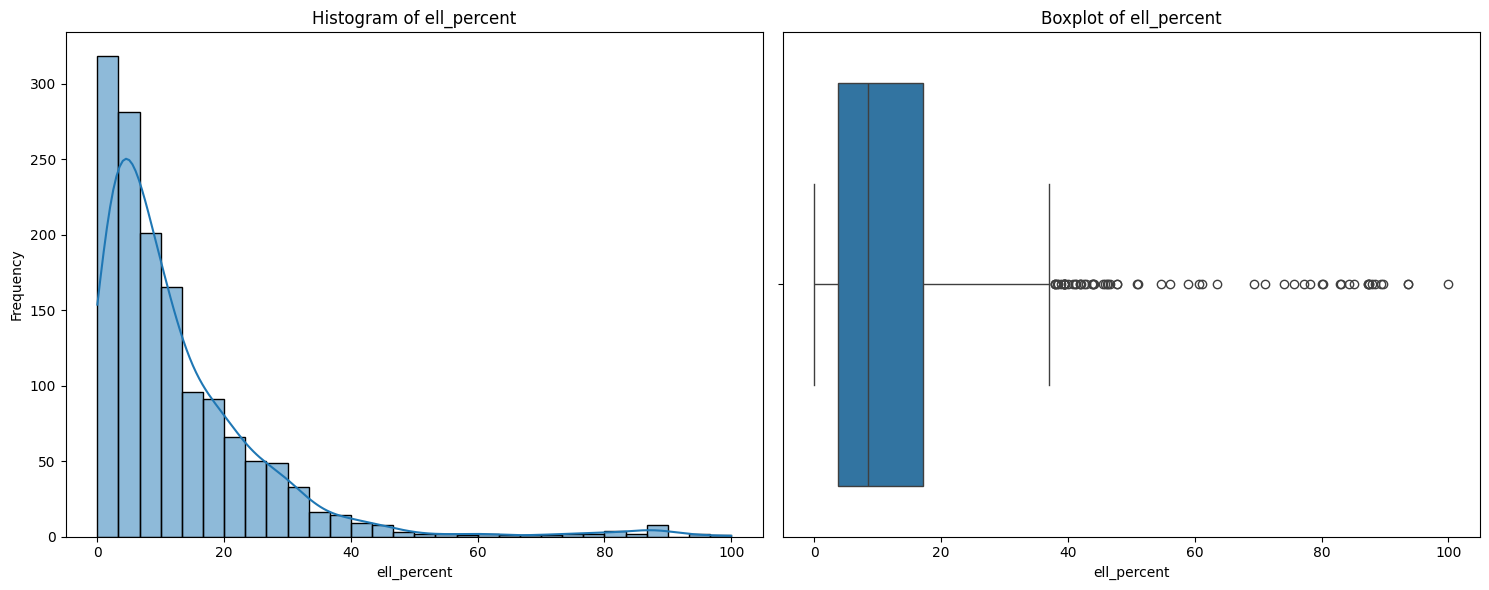

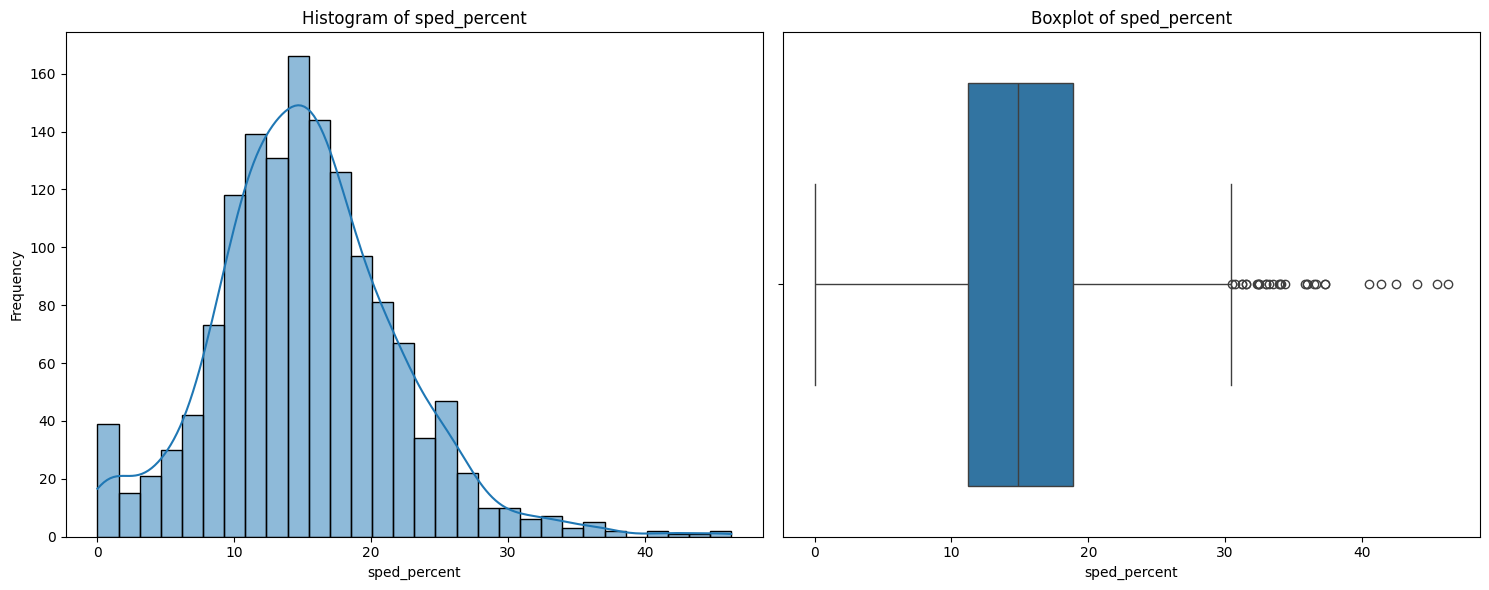

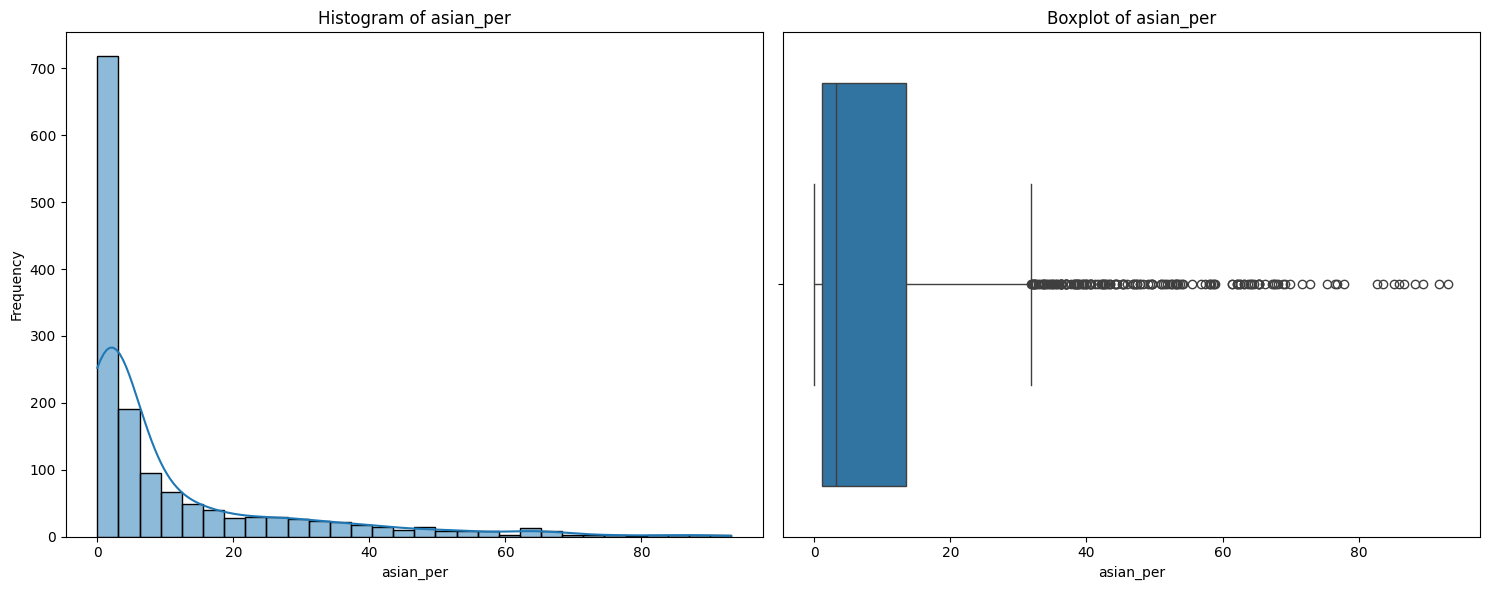

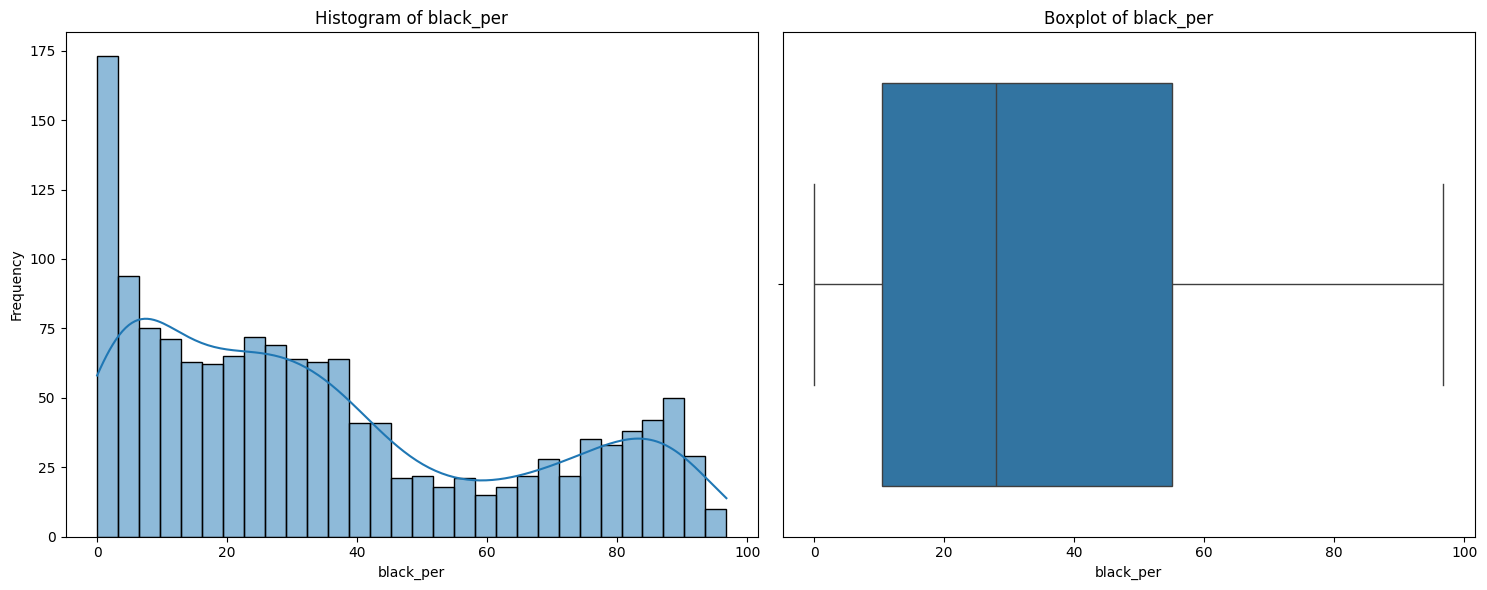

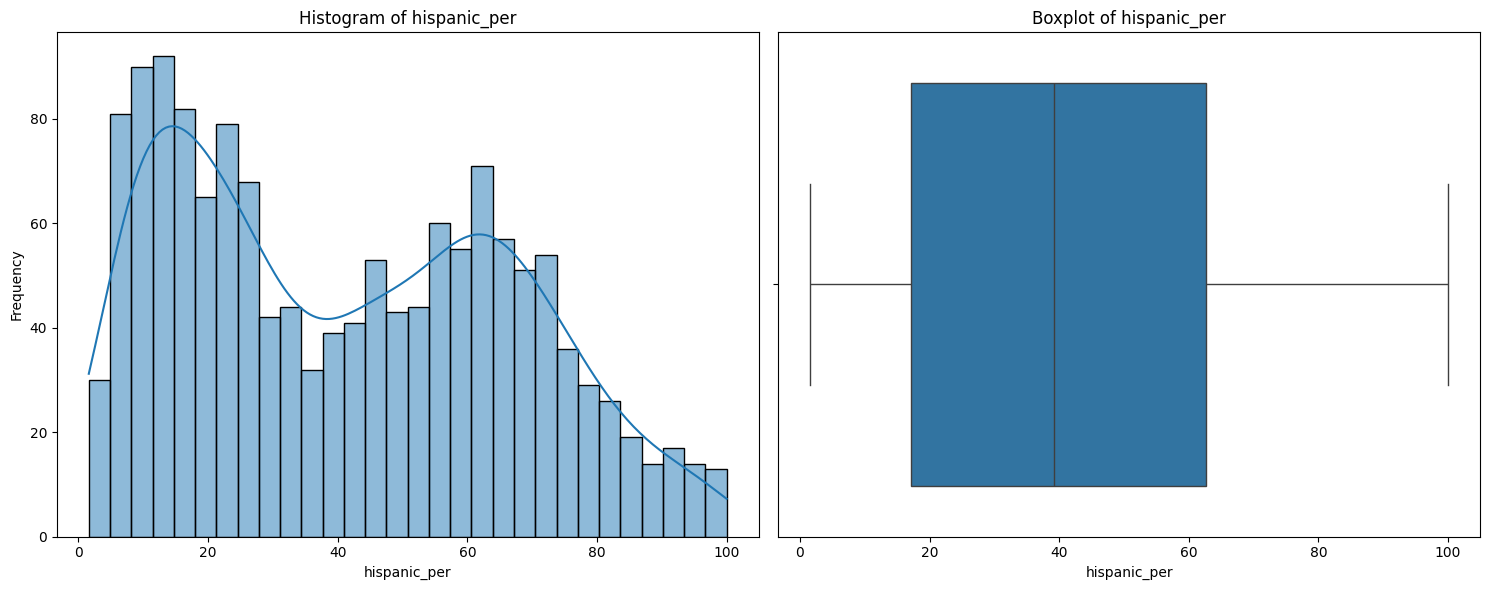

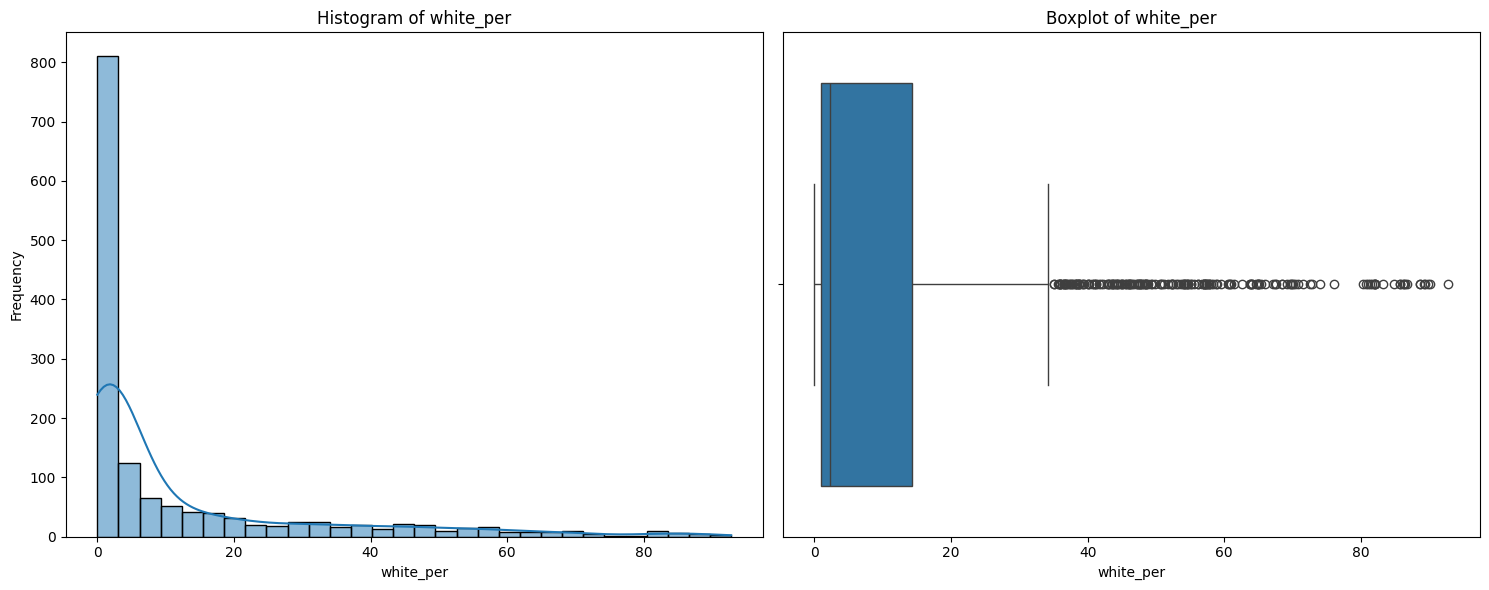

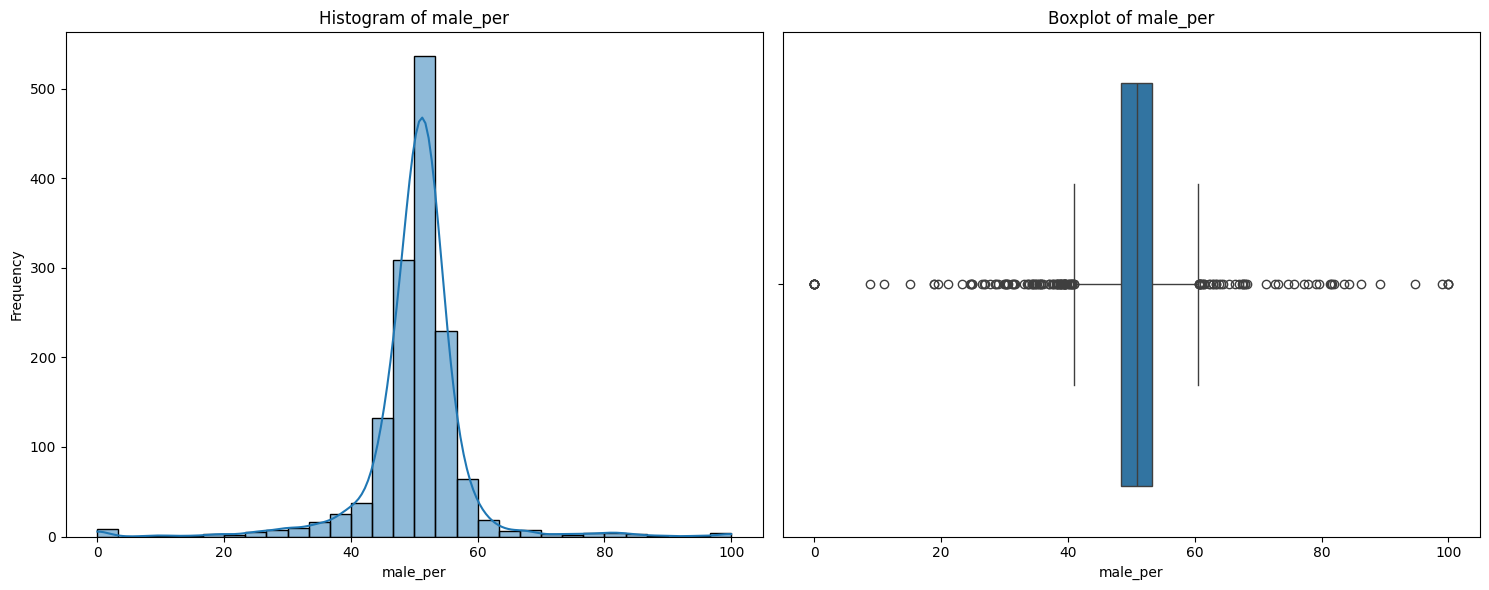

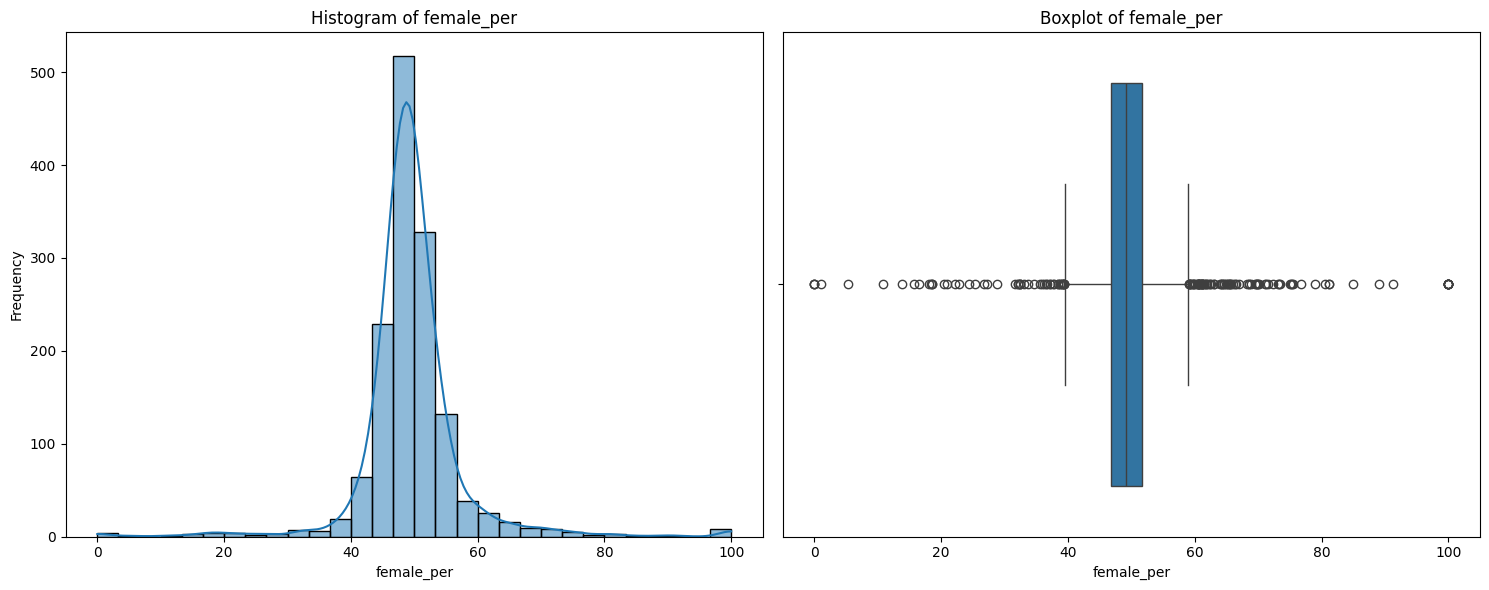

In [12]:
eda1.plot_all_columns()

#### fl_percent: 
The distribution appears moderately right-skewed, suggesting that a larger number of schools have lower percentages of students eligible for free lunch, indicating varying economic backgrounds
 
#### total_enrollment:
The variable is right-skewed with most schools having a smaller size of total enrollment and a few schools with very high student numbers, showing great variability in school sizes

#### sped_percent:
the distribution of the percentage of students in special education, likely right-skewed, indicating that most schools have a relatively low proportion of special education students

#### asian_per: 
The distribution is highly right-skewed, which suggests that the majority of schools have a small percentage of Asian students

#### black_per:
The distribution for black race may be more  multimodal, indicating a more even or varied distribution of Black students across schools

#### white_per:
Similar to asian_per, this is likely right-skewed, indicating that a higher percentage of White students is less common across the schools

#### male_per and female_per:

The distribution for gender percentages may be expected to be more balanced across schools, often forming a bell-shaped curve if there is a relatively symmetric distribution of both male and female students

### 4.2 Dataset2 overview

Next we check dataset2 Dtype.

In [13]:
filtered_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 1 to 2507
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Demographic                         367 non-null    object 
 1   DBN                                 367 non-null    object 
 2   School Name                         367 non-null    object 
 3   Cohort                              367 non-null    object 
 4   Total Grads - % of cohort           326 non-null    float64
 5   Total Regents - % of cohort         326 non-null    float64
 6   Advanced Regents - % of cohort      326 non-null    float64
 7   Regents w/o Advanced - % of cohort  326 non-null    float64
 8   Local - % of cohort                 326 non-null    float64
 9   Still Enrolled - % of cohort        326 non-null    float64
 10  Dropped Out - % of cohort           326 non-null    float64
dtypes: float64(7), object(4)
memory usage: 34.4+

We found 41 null values in the percentage columns, so we conducted a detailed analysis of each one.

#### 4.2.1 Total Grads - % of cohort
The analysis of 'Total Grads - % of cohort' helps gauge school graduation rates. The data shows an average rate of 61%, with notable variability, as indicated by a 21% standard deviation. The extremes, 1% and 100%, highlight significant differences in school performance.

In [14]:
eda2 = EDAPerformer(filtered_df2)
eda2.describe_stats('Total Grads - % of cohort')

count    326.000000
mean      61.263804
std       21.828070
min        1.200000
25%       48.325000
50%       62.850000
75%       77.650000
max      100.000000
Name: Total Grads - % of cohort, dtype: float64

And then we analyze boxplot to see how often the extremes occur.

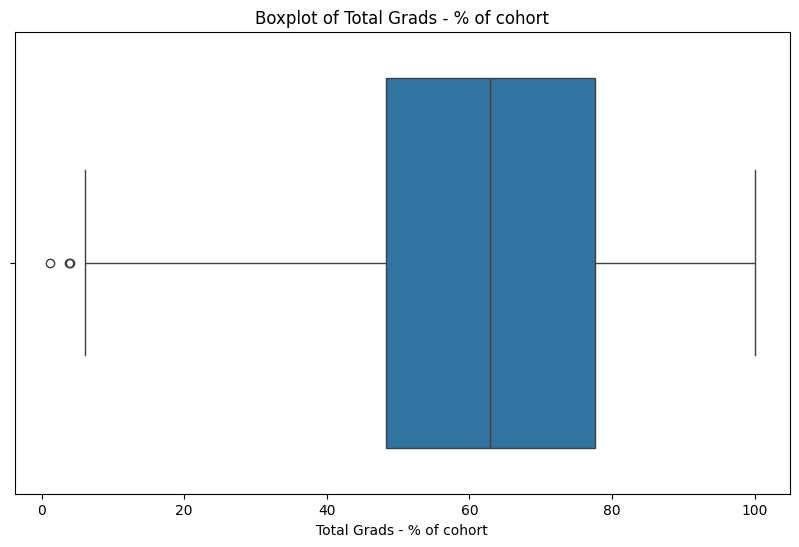

In [15]:
eda2.plot_boxplot('Total Grads - % of cohort')

Total Grads - % of cohort indicates a median graduation rate above 60%, with a relatively symmetric distribution of values and a few outliers mean schools with much lower graduation rates.

### 4.2.2 Columns analysis

In this step, because of the large number of columns, we analyze all the remaining columns together to see the quality of the data and the frequency of outliers.

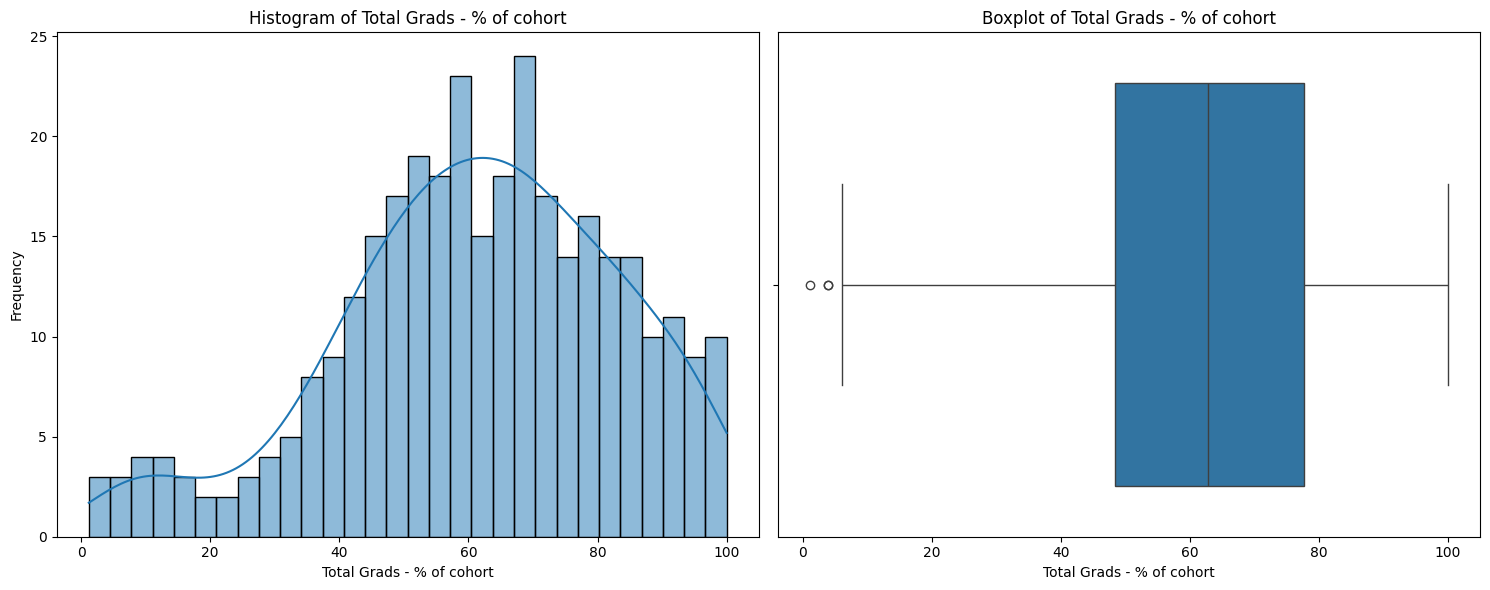

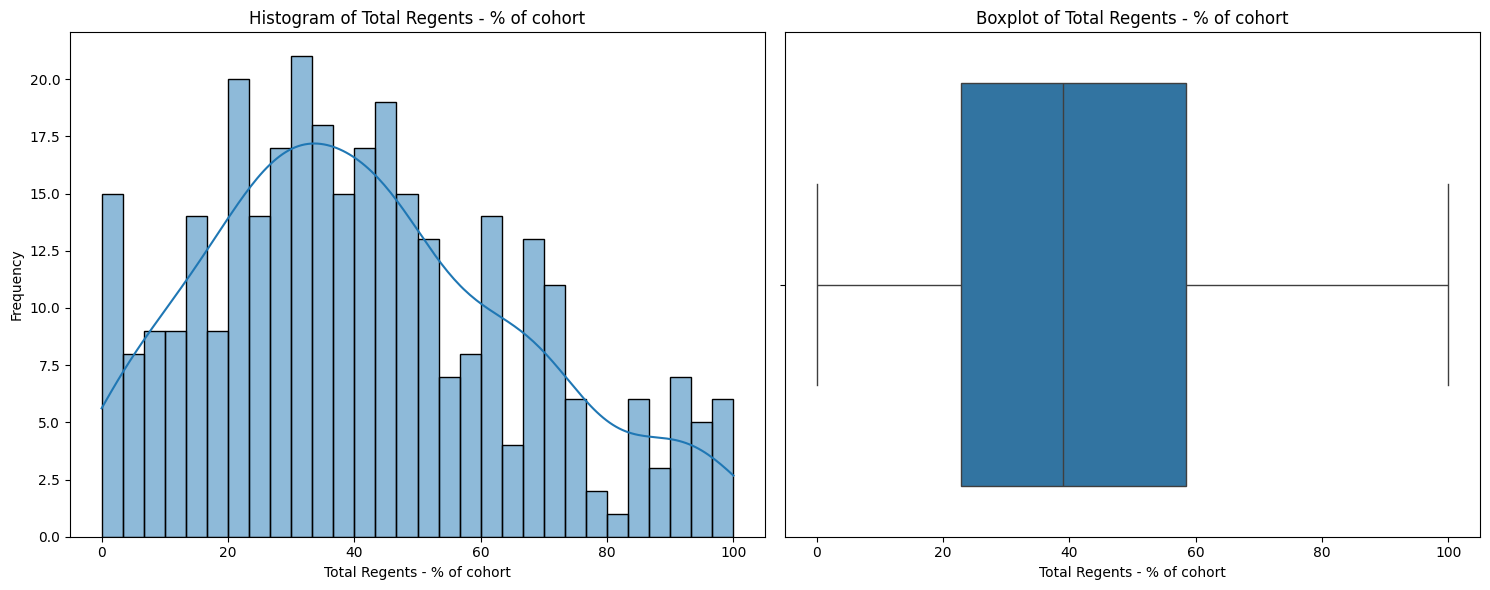

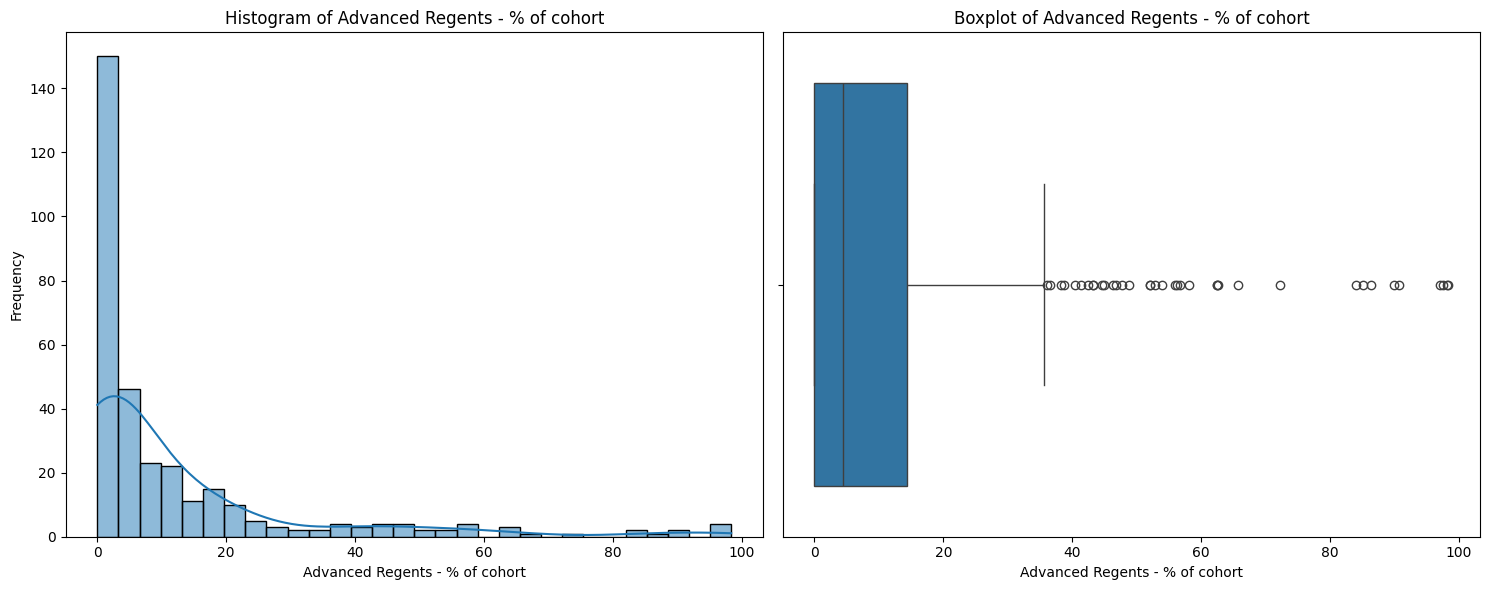

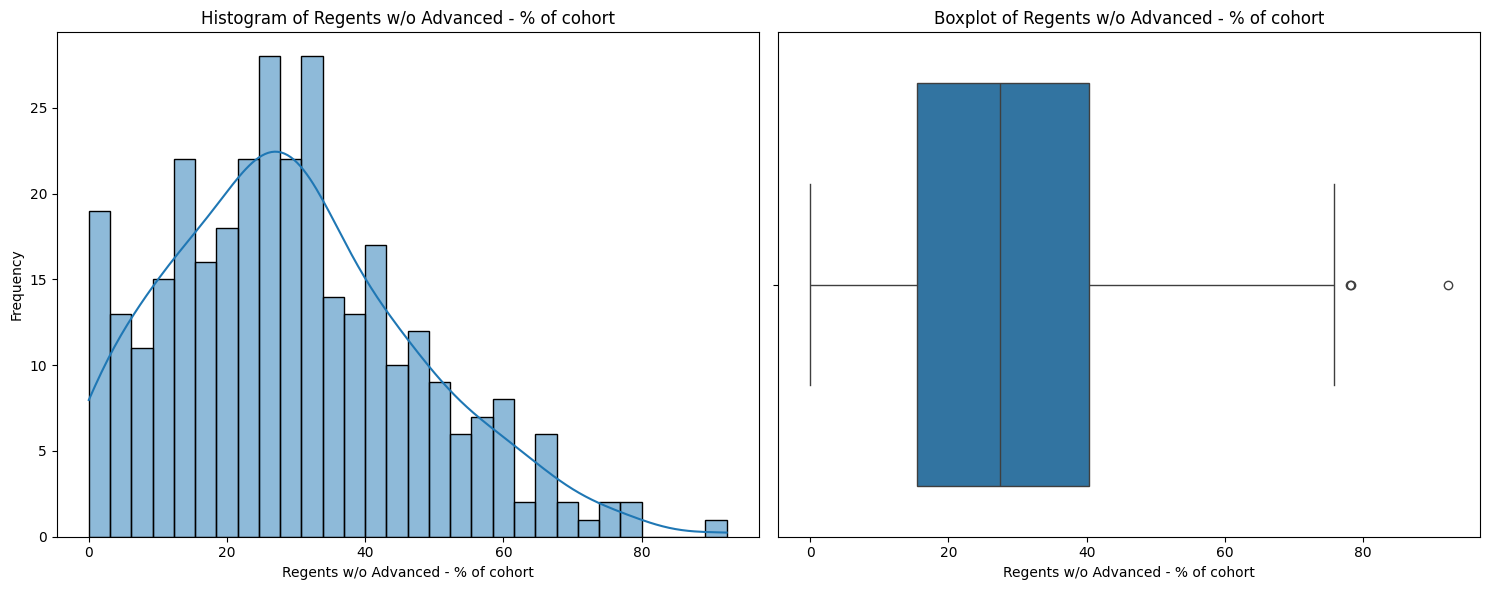

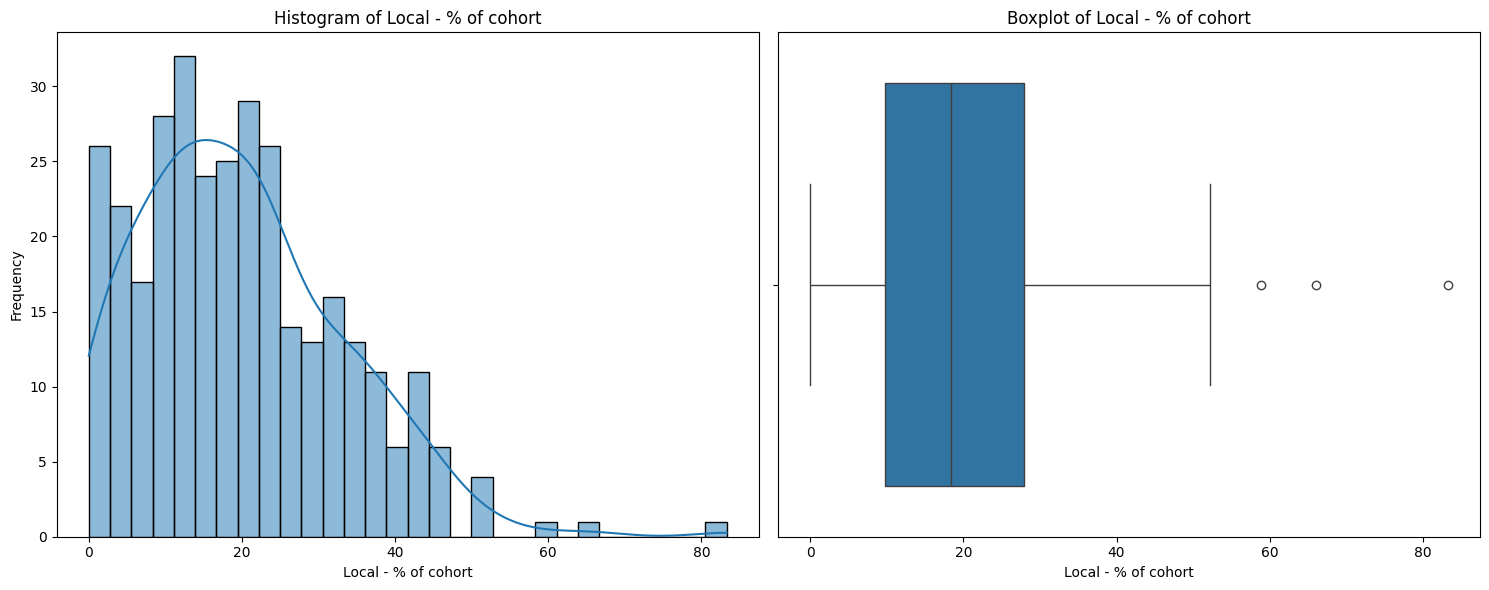

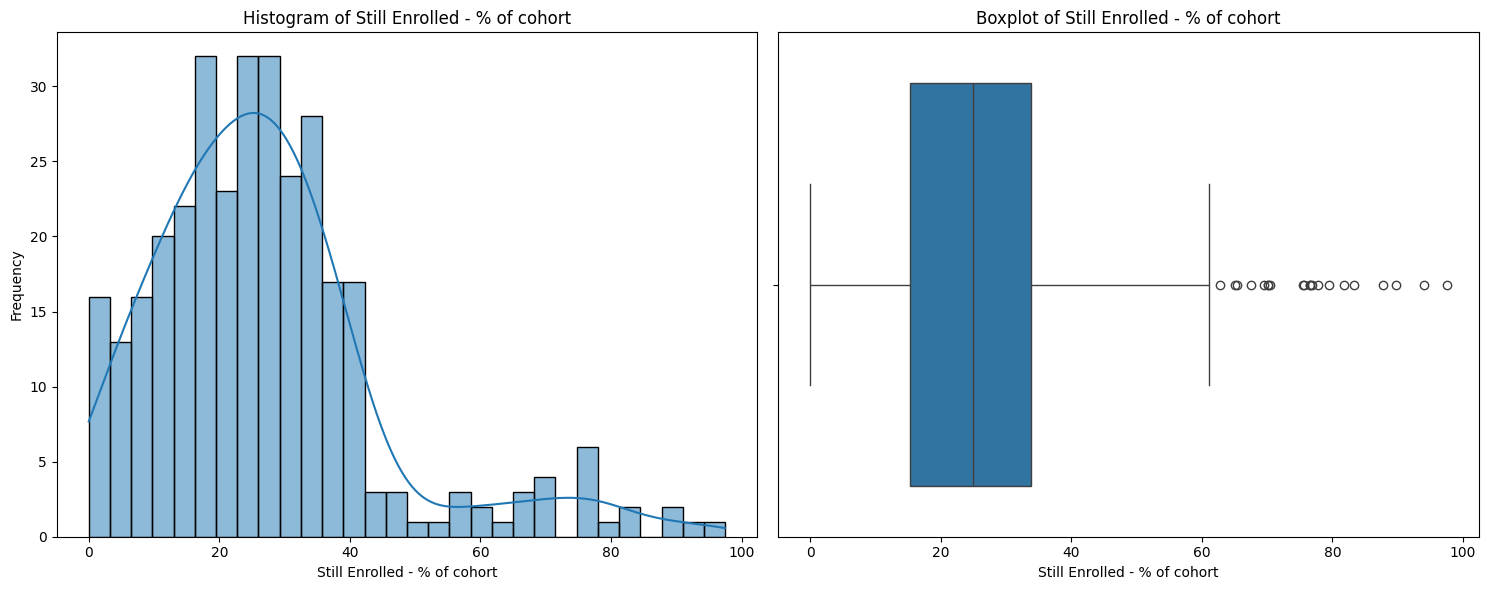

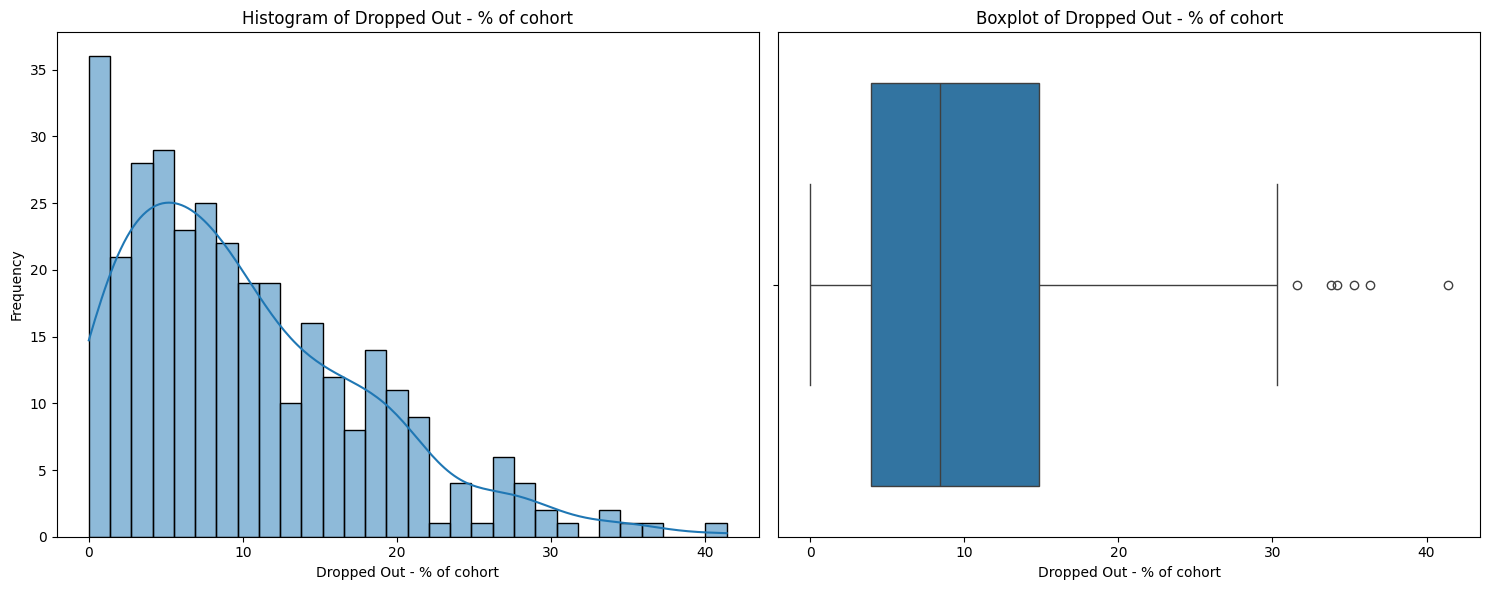

In [30]:
eda2.plot_all_columns()

#### Total Grads - % of cohort:
The histogram likely shows a slightly left-skewed distribution, implying that a larger number of schools have higher graduation rate.

#### Total Regents - % of cohort:
The distribution might be expected to be somewhat bell shaped distributed with a skew towards the right, indicating that most schools have a moderate to high pass rate on Regents exams

#### Advanced Regents - % of cohort:
The distribution is clear right-skewed, highlighting that a majority of schools have fewer students achieving advanced scores on their Regents exams.

#### Regents w/o Advanced - % of cohort:
This histogram presents a right-skewed distribution as well, with most schools showing a lower percentage of students passing Regents exams without advanced scores. This mean by that while students are passing, they are not frequently scoring at the advanced level.

#### Local - % of cohort:
The distribution may also be moderately right-skewed, suggesting that while most schools have a fair number of students obtaining local diplomas, small amount of schools have very high local diploma attainment rate

#### Still Enrolled - % of cohort:
this is a  right-skewed distribution, indicating that while most students continue to be enrolled, there is variability with some schools having higher numbers of students who remain enrolled past the expected graduation date.

#### Dropped Out - % of cohort:
The dropout rate is likely to be right-skewed, with the bulk of schools having lower dropout rates and a tail of schools where dropout rates are higher

## 5 Data Preparation

### 5.1 Merge data

For records that share the same DBN across the two datasets, we merged them based on the enrollment year and removed schools that are not present in dataset2.

Eliminating schools not found in dataset2 ensures that the analysis only includes schools with complete data across all considered years, maintaining the integrity of the dataset and preventing skewed results from partial data.

In [17]:
merged_df = processor.process_and_merge_data(converted_df, filtered_df2)
merged_df.to_csv('merged_data.csv', index=False)
merged_df.head()

,dbn,name,schoolyear,fl_percent,total_enrollment,ell_percent,sped_percent,asian_per,black_per,hispanic_per,white_per,male_per,female_per,Total Grads - % of cohort,Total Regents - % of cohort,Advanced Regents - % of cohort,Regents w/o Advanced - % of cohort,Local - % of cohort,Still Enrolled - % of cohort,Dropped Out - % of cohort
13,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,20082009,95.3,470,10.6,25.1,10.0,29.4,56.2,3.0,56.2,43.8,67.3,30.9,0.0,30.9,36.4,27.3,5.5
22,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,20082009,60.9,586,6.7,21.7,19.3,23.5,47.8,4.3,52.4,47.6,67.0,32.1,5.4,26.8,34.8,29.5,3.6
23,01M450,EAST SIDE COMMUNITY HIGH SCHOOL,20082009,67.7,546,4.9,26.7,6.2,26.6,59.7,6.0,52.2,47.8,72.5,60.0,0.0,60.0,12.5,16.3,11.3
24,01M509,MARTA VALLE SECONDARY SCHOOL,20082009,81.5,441,12.9,18.4,11.8,17.7,68.7,1.8,52.2,47.8,44.6,20.0,4.6,15.4,24.6,41.5,12.3
25,01M515,LOWER EAST SIDE PREPARATORY HIGH SCHOOL,20082009,77.0,514,87.5,0.6,93.2,3.3,3.1,0.4,52.9,47.1,48.5,37.0,30.0,7.0,11.5,39.0,12.5


### 5.2 Null removal

The INFO function reveals that ell_percent contains five null values. Based on our prior exploratory data analysis, we will use the median to impute these missing values.

In [32]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 321 entries, 13 to 1440
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   dbn                                 321 non-null    object 
 1   name                                321 non-null    object 
 2   schoolyear                          321 non-null    object 
 3   fl_percent                          321 non-null    float64
 4   total_enrollment                    321 non-null    int64  
 5   ell_percent                         321 non-null    float64
 6   sped_percent                        321 non-null    float64
 7   asian_per                           321 non-null    float64
 8   black_per                           321 non-null    float64
 9   hispanic_per                        321 non-null    float64
 10  white_per                           321 non-null    float64
 11  male_per                            321 non

We check the updated database by using the median method instead of the null value.

In [19]:
df = processor.replace_ell_percent_nulls_with_median(merged_df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 321 entries, 13 to 1440
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   dbn                                 321 non-null    object 
 1   name                                321 non-null    object 
 2   schoolyear                          321 non-null    object 
 3   fl_percent                          321 non-null    float64
 4   total_enrollment                    321 non-null    int64  
 5   ell_percent                         321 non-null    float64
 6   sped_percent                        321 non-null    float64
 7   asian_per                           321 non-null    float64
 8   black_per                           321 non-null    float64
 9   hispanic_per                        321 non-null    float64
 10  white_per                           321 non-null    float64
 11  male_per                            321 non

### 5.3 Removal of extremes

Using processor.apply_winsorization(df) removes extreme values from the data, limiting the effect of outliers on the analysis.

In [20]:
df = processor.apply_winsorization(df)

## 6 Prepped Data Review

### 6.1 Averge Dropout Rates by School


The plot_dropout_rates function visualizes the average dropout rates for the top 20 schools to identify and analyze schools with higher dropout rates. This helps in recognizing patterns or factors associated with school dropouts and in prioritizing interventions for schools that may require additional support to improve student retention.

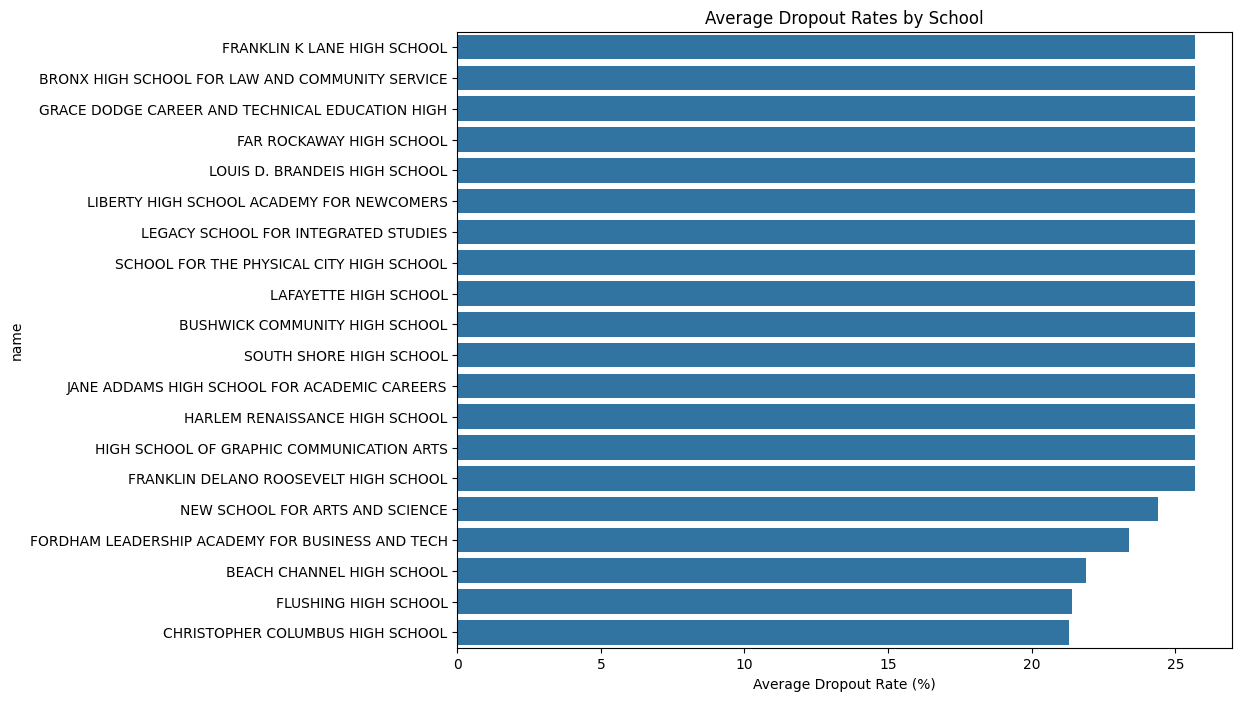

In [22]:
eda = EDAPerformer(df)
eda.plot_dropout_rates()

For dataset2, we plotted the average dropout rates by school, indicating significant variance among the institutions within the New York City public school system. Washington Irving High School exhibits the lowest average dropout rate, while schools such as Evander Childs High School are on the higher end of the spectrum, indicating lower retention rates

### 6.2 Multivariate relationships and correlation heat maps

 Pairplot visualizations allow a simultaneous examination of relationships between multiple variables, aiding in a quick grasp of how different features interrelate.

 Observing scatter plots between features like gender and racial percentages, English language learner status, total enrollment, and graduation rates can reveal potential correlations or trends.



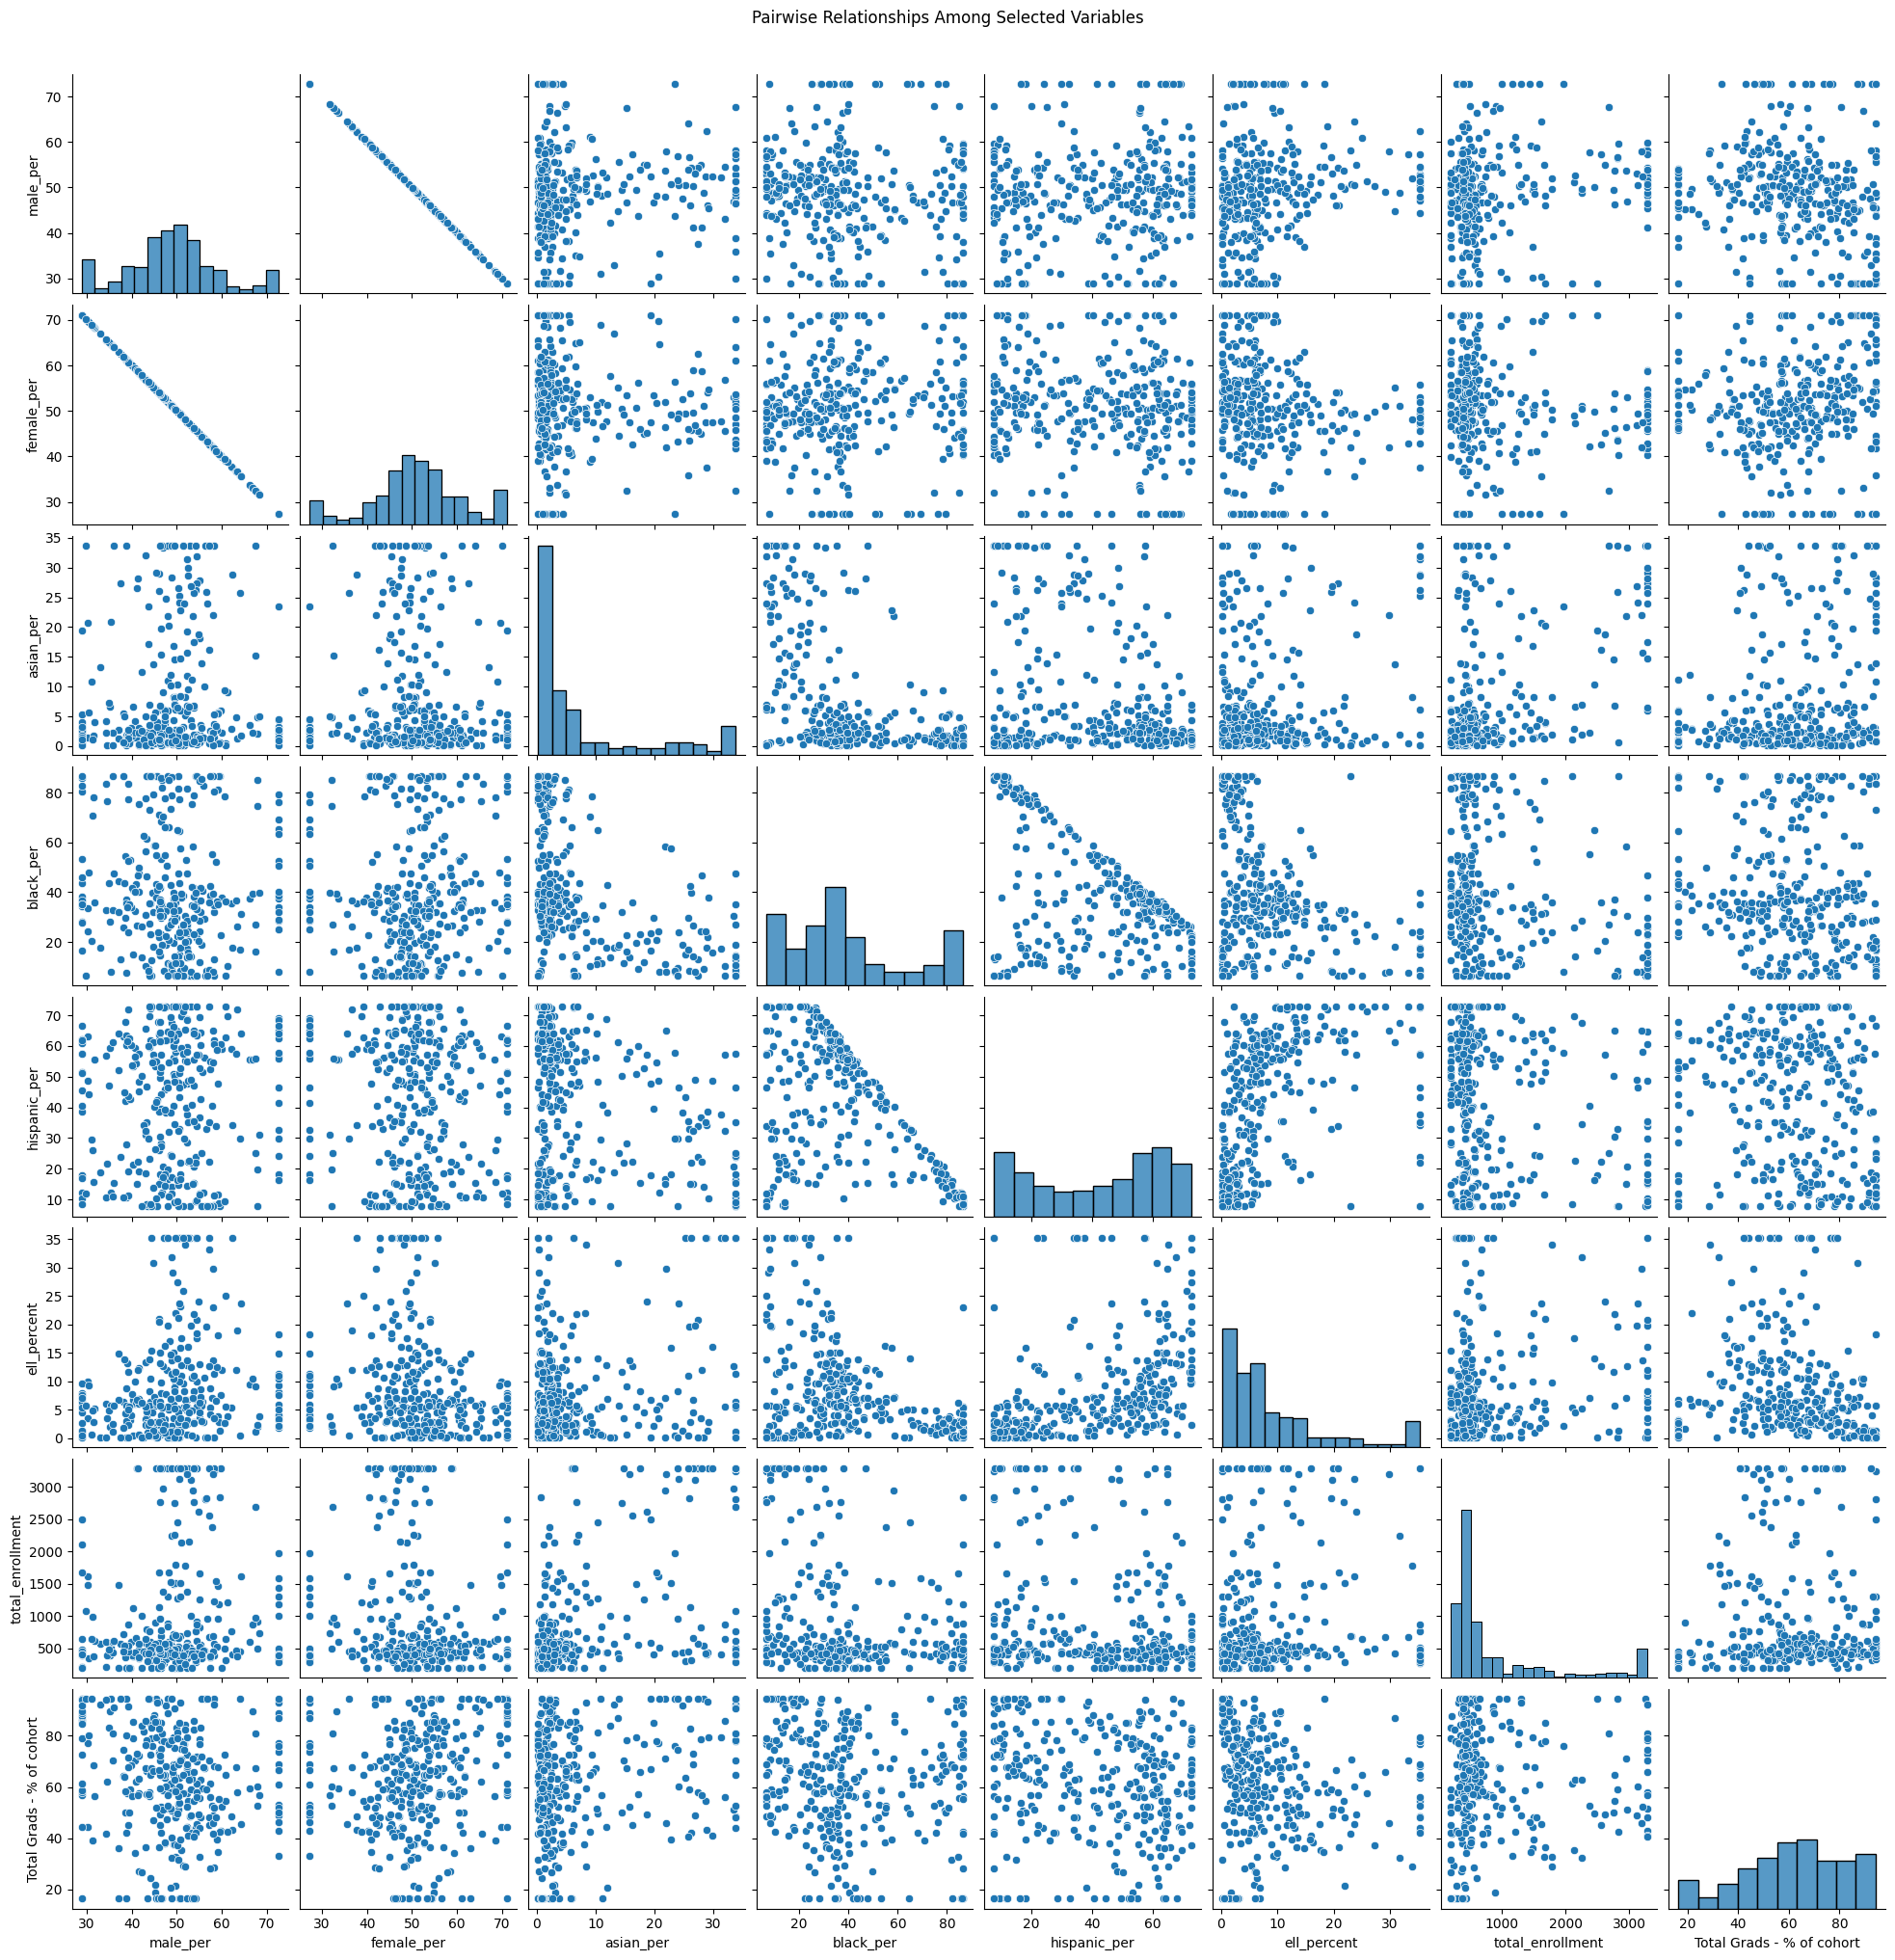

In [23]:
eda.plot_pairplot(['male_per', 'female_per', 'asian_per', 'black_per','hispanic_per','ell_percent','total_enrollment','Total Grads - % of cohort'])

For further analyzing ,we study the correlation matrix by the heatmap with 'Total Grads - % of cohort' as the target variable. Heatmaps display correlation coefficients between variables, helping to understand which features strongly relate to the target variable, such as graduation rates.

d:\final project\GraduationOutcomes\src\graduation_outcomes\graduation_eda.py:114: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(self.df.corr(), annot=True, fmt=".2f", cmap='coolwarm')


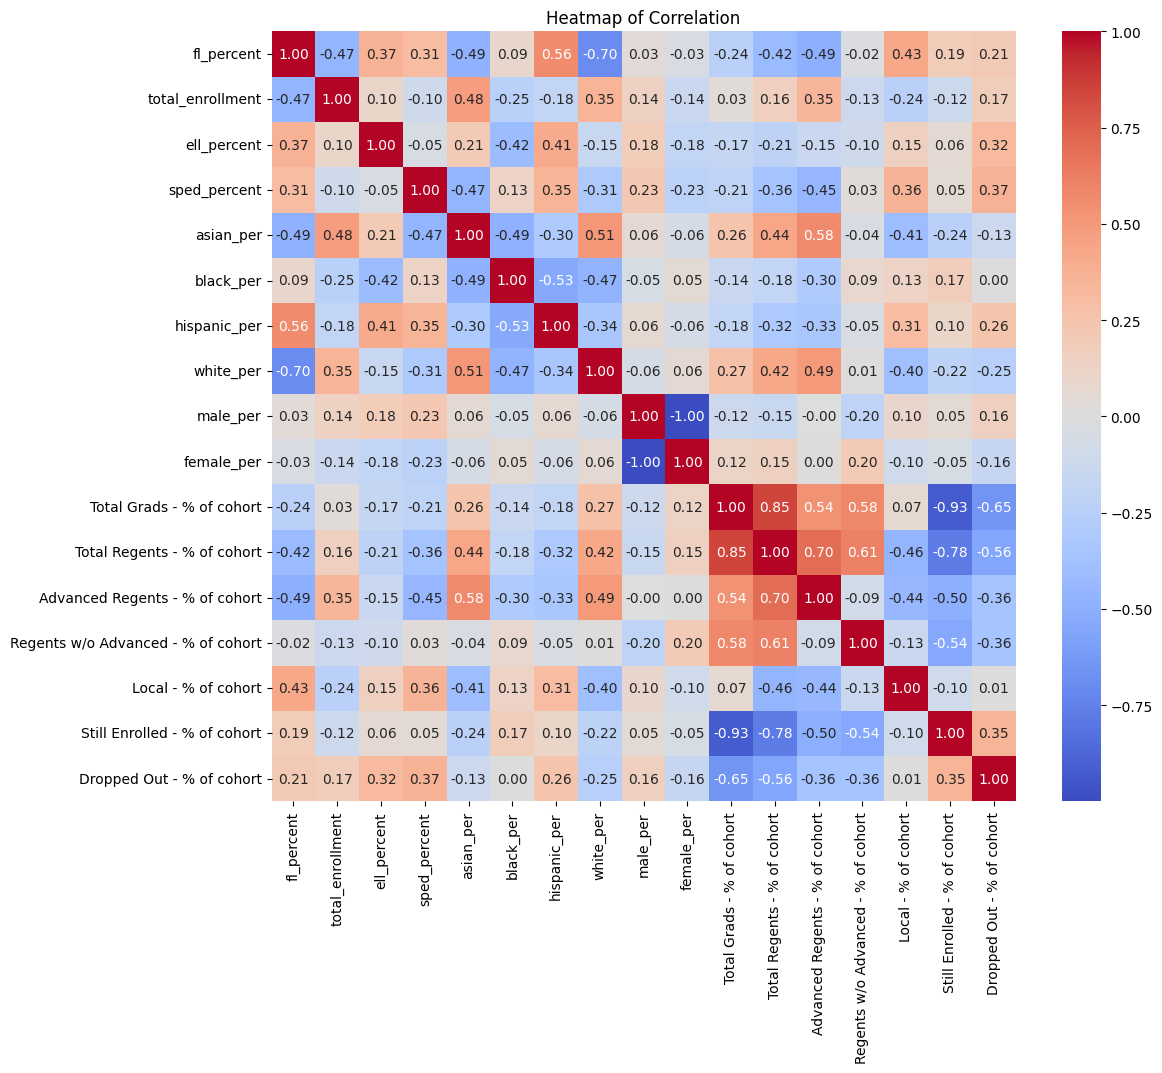

In [24]:
eda.plot_heatmap()

 We notice several notable correlations. 'Total Grads' shows a strong positive correlation with 'Total Regents' and 'Advanced Regents', indicating that as the percentage of graduates increases, the percentage of students achieving regents and advanced regents also increases. These relationships are crucial for understanding the factors that influence graduation rates and can guide targeted interventions to improve educational outcomes 

## 7 Investigative Analysis & Results

### 7.1 Association between students' economic background and educational outcomes

* Purpose:
To investigate the relationship between economic background and exam pass rates.
Aims to offer insights into the academic success related to economic factors, highlighting educational equity.

* Implementation Details:
Utilize a regression plot for a dual purpose: to display data points and to draw a trend line, showing the relationship's direction and strength.
The plot correlates 'fl_percent' with 'Total Regents - % of Cohort', directly connecting economic status with students' performance in exams.

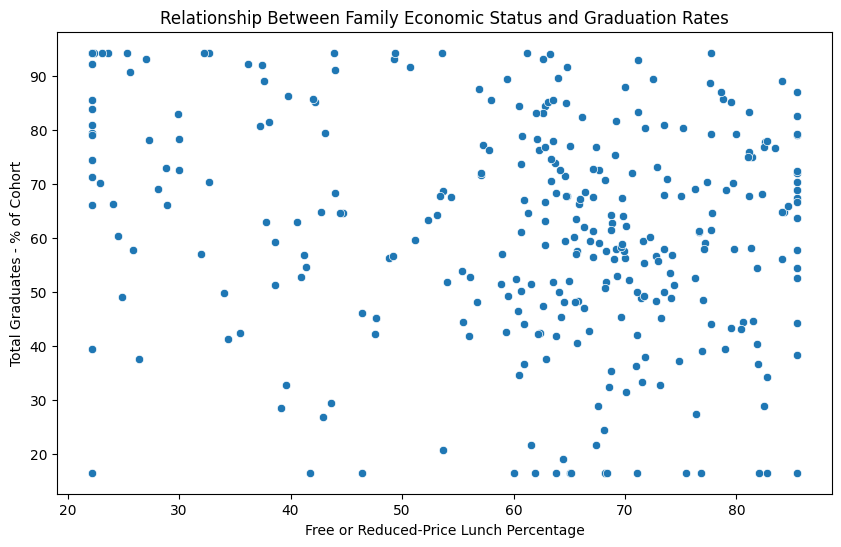

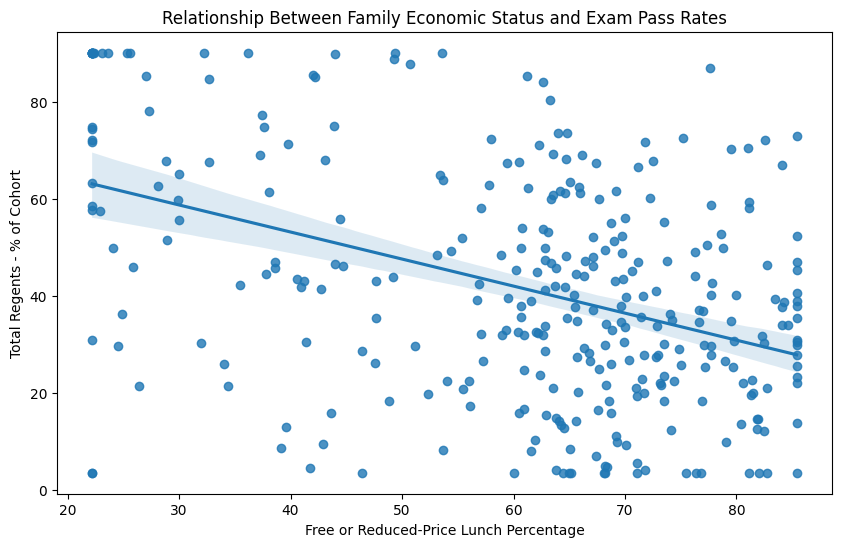

In [25]:
from src.graduation_outcomes.graduation_investigative_analysis import InvestigativeAnalysis
analysis = InvestigativeAnalysis(df)
analysis.plot_graduation_rates()
analysis.plot_exam_pass_rates()

Conclusion:
* The first scatter plot showing graduation rates against economic status. The distribution suggests that there is a variation in graduation rates across the spectrum of economic status.
* The second scatter plot representing exam pass rates against economic status, indicate a trend that shows a negative association. As the percentage of students receiving free lunches increases, the percentage of students passing Regents exams tends to decrease.

### 7.2 Association between school racial diversity background and educational outcomes
* Purpose: To investigate how racial diversity within schools impacts graduation rates and exam pass rates.
* Significance: This analysis helps understand if a more racially diverse student body correlates with better educational outcomes, addressing key research questions about diversity and school performance.
* Implementation Details:
Racial Diversity Index Calculation: Computes a diversity index based on the percentages of different racial groups.  This index quantifies racial diversity, ranging from 0 (no diversity) to 1 (highest diversity).

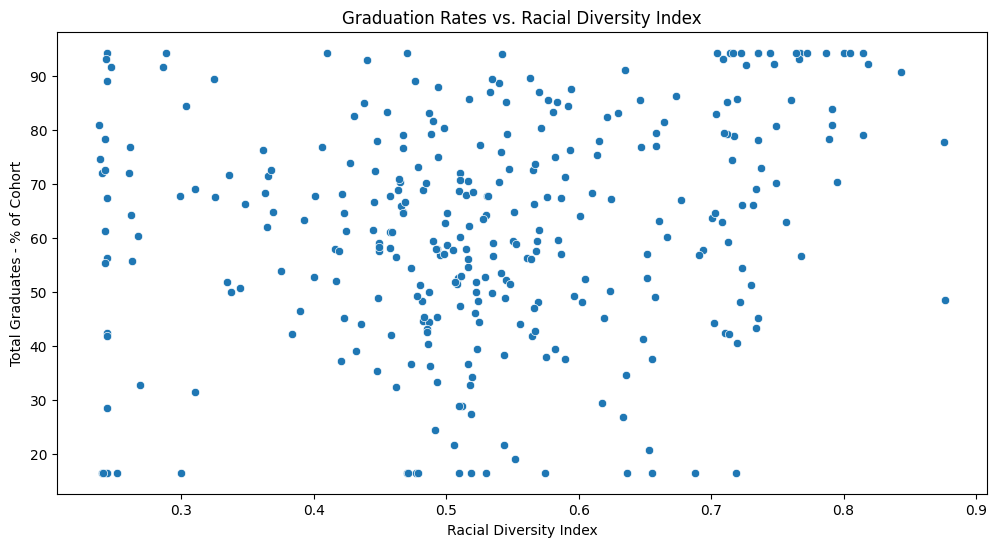

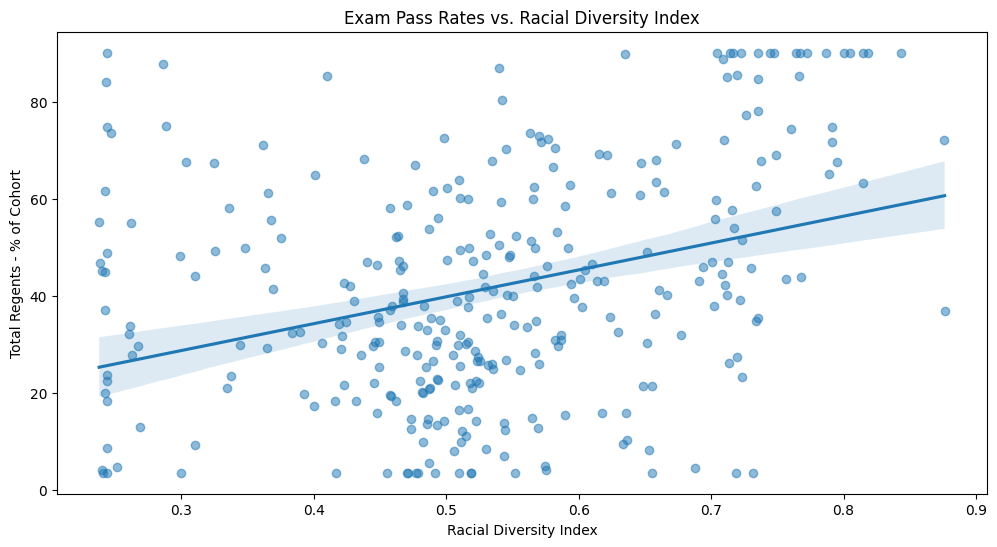

In [26]:
analysis.analyze_and_plot_data()

In this scatter plot, show ich 'Total Regents - % of cohort' against the racial diversity, it shows a positive trend, as indicated by the upward-sloping trend line. This indicates that schools with higher racial diversity indices tend to have higher exam pass rates and  better exam outcomes.

### 7.3 Association between school special education needs and educational outcomes

The plot_graduation_vs_ell_sped function is implemented to investigate the potential impact of English Language Learner (ELL) and Special Education (SpEd) enrollments on graduation rates. The function constructs scatter plots that allow us to visually assess the correlation between these variables.

For ELL and SpEd percentages, we plot them against the graduation rates, and then fit a linear trend line to each scatter plot to discern any linear relationship. By plotting both ELL and SpEd data, we can compare their respective influences on graduation outcomes.


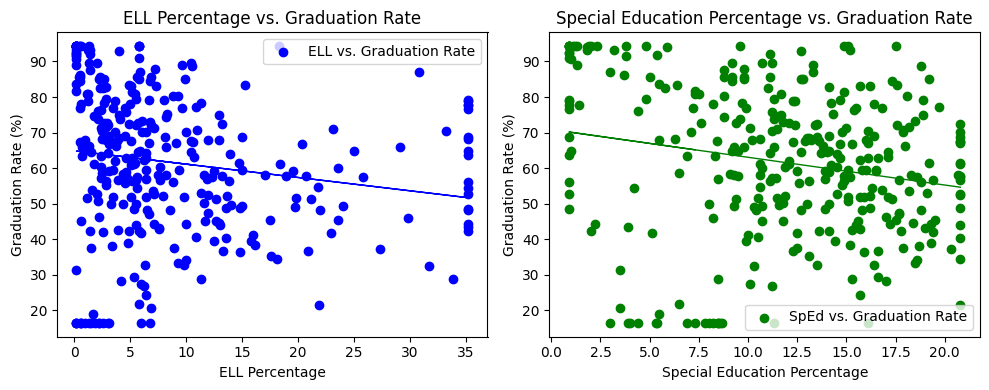

In [27]:
analysis.plot_graduation_vs_ell_sped()

Conclusion:
* In the first plot, ELL (English Language Learner) percentage is plotted against graduation rates. There is a  negative trend indicated by trend line; as the ELL percentage increases, the graduation rate tends to decrease.
* The second plot shows the relationship between the Special Education (SpEd) percentage and graduation rates. Similar to the ELL plot, there is a negative trend,  showing that higher percentages of special education students correspond with  lower graduation rate.

### 7.4 Destination after graduation
* Purpose:
To investigate the impact of racial diversity on graduation and exam pass rates in schools.
* Implementation:
A racial diversity index is calculated and used to plot its relationship with graduation and exam pass rates using scatter and regression plots.

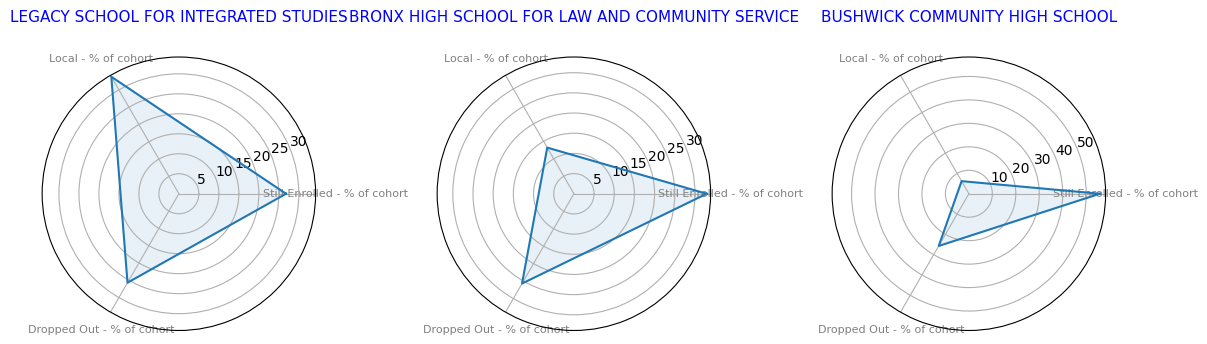

In [31]:
selected_school_names = [
    'BUSHWICK COMMUNITY HIGH SCHOOL',
    'LEGACY SCHOOL FOR INTEGRATED STUDIES',  
    'BRONX HIGH SCHOOL FOR LAW AND COMMUNITY SERVICE' 
]
analysis.plot_school_outcomes(selected_school_names)

Legacy School for Integrated Studies has a higher percentage of students who are still enrolled compared to those who have local diplomas or have dropped out. This could suggest a retention challenge or a longer pathway to graduation.

Bronx High School for Law and Community Service displays a more balanced profile between the categories but still shows a higher proportion of students still enrolled over those with local diplomas or dropouts。

Bushwick Community High School has a significantly higher percentage of students still enrolled and a lower dropout rate, with the local diploma percentage being the smallest. This school appears to have a high retention rate but may face challenges in getting students to graduate within the timeframe。

 ### 7.5 Analysis of School Data Using Linear Regression

In this analysis, we aim to understand the factors affecting graduation rates in schools. We have built a linear regression model considering the following features:
- `asian_per`: The percentage of Asian students in the school. We hypothesize that schools with a higher percentage of Asian students might have different graduation rates due to various socio-economic and cultural factors.
- `white_per`: Similarly, the percentage of white students is included to see if there's a notable difference in graduation rates.
- `Total Regents - % of cohort`: This represents the percentage of students passing the Regents exams, which be a strong indicator of academic performance and hence graduation rates.

We chose a linear regression model for its simplicity and interpretability. It's a good starting point for exploring linear relationships between selected features and the graduation rate.


In [29]:
features = ['asian_per', 'white_per', 'Total Regents - % of cohort']
target = 'Total Grads - % of cohort'
model, mse, r2 = analysis.train_and_evaluate(features, target)

Mean Squared Error: 107.25153165160158
R^2 Score: 0.7472305551254048


We evaluated the model using the Mean Squared Error (MSE) and R^2 Score. The MSE will provide us with the average of the squares of the errors, essentially giving an idea of the magnitude of errors made by the model. The R^2 Score will indicate how well the independent variables explain the variance in the dependent variable, in this case, the graduation rate.

## 8 Conclusions

Our investigation into the New York City public school system shows that socioeconomic and demographic factors had a significant impact on student success, with a particularly strong association between economic status and educational outcomes such as graduation and exam pass rates. Racial distribution emphasize the importance of race-inclusive policies to promote academic attainment.        
Our work also showed that,  graduation rates can be  predicted by linear regression models employing demographic, by the high R^2 Score. This result emphasizes the predictable of learning outcomes based on certain characteristics and shows how these models can be used to guide targeted interventions meant to raise student achievement.